In [4]:
import pandas as pd
data = pd.read_csv("./Spam_Emails.csv",sep=',')
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [5]:
# Count the length of data and to column "length"
data["length"] = data["text"].apply(lambda x: len(x.split()))
#data.sort_values(by='length', ascending=False).head(10) # List top 10 long sentence
data

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,324
1,Subject: the stock trading gunslinger fanny i...,1,89
2,Subject: unbelievable new homes made easy im ...,1,87
3,Subject: 4 color printing special request add...,1,98
4,"Subject: do not have money , get software cds ...",1,52
...,...,...,...
5723,Subject: re : research and development charges...,0,297
5724,"Subject: re : receipts from visit jim , than...",0,244
5725,Subject: re : enron case study update wow ! a...,0,515
5726,"Subject: re : interest david , please , call...",0,276


0    4360
1    1368
Name: spam, dtype: int64


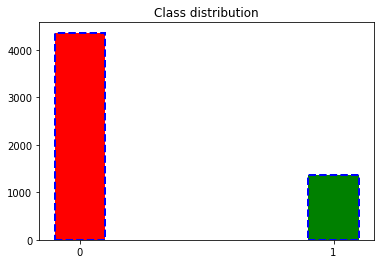

In [6]:
# Plot the distribution of classes
import numpy as np
import matplotlib.pyplot as plt
y_count = data['spam'].value_counts()
print(y_count)
class_list = np.array([0, 1])
plt.bar(class_list, y_count, color=['r', 'g', 'b'], width=0.2, tick_label=class_list,  ec='b', ls='--', lw=2)
plt.title("Class distribution")
plt.show()

Text(0.5, 1.0, 'Sentence length distribution')

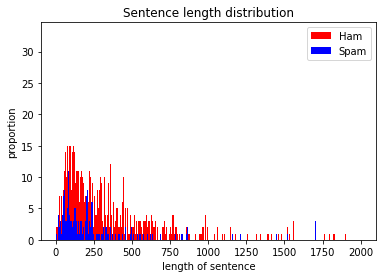

In [11]:
spam_sent = [i for i in data['length'][0:1368] if i!=0]
ham_sent = [i for i in data['length'][1368:] if i!=0]

plt.hist(ham_sent, bins=range(min(ham_sent), 2000, 1), 
              alpha=1, color="red")
plt.hist(spam_sent, bins=range(min(spam_sent), 2000, 1),
              alpha=1, color="blue")
labels = ['Ham',"Spam"]
plt.legend(labels)
plt.xlabel("length of sentence")
plt.ylabel("proportion")
plt.title("Sentence length distribution")

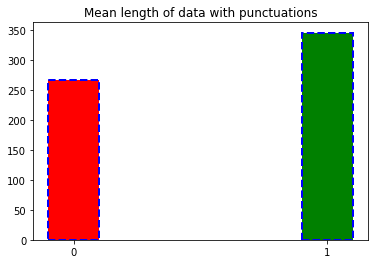

Average sentence length of Spam are 266.0 words
Average sentence of Ham are 346.0 words
Average sentence of dataset are 327.0 words


In [12]:
'''
calculate the average length of the spam and ham sentence 
'''
mean_length = [None,None]
mean_length[0] = np.mean(data['length'][0:1368]) # with class of 1
mean_length[1] = np.mean(data['length'][1368:]) #with class of 0
plt.bar(class_list, mean_length, color=['r', 'g', 'b'], width=0.2, tick_label=class_list,  ec='b', ls='--', lw=2)
plt.title("Mean length of data with punctuations")
plt.show()
print("Average sentence length of Spam are {} words".format(round(mean_length[0],0)))
print("Average sentence of Ham are {} words".format(round(mean_length[1],0)))
print("Average sentence of dataset are {} words".format(round(np.mean(data["length"]),0)))

In [13]:
data['text'].str.split(' ', expand=True).stack().value_counts()

            177976
-           105222
.            92494
,            61143
the          50110
             ...  
nested           1
pointers         1
7896             1
2310             1
desiring         1
Length: 37442, dtype: int64

The punctuations, the most frequent words and the most rare words shold be dropped.

In [8]:
# lower the letter and remove the punctuations
import string
def remove_punctuations_and_lower(text):
    for punctuation in string.punctuation:
        text = text.lower()
        text = text.replace(punctuation, '')
    return text
    
# update the cleaned_text and their lengthes
data["text_cleaned"] = data['text'].apply(remove_punctuations_and_lower)
data["length"] = data["text_cleaned"].apply(lambda x: len(x.split()))
data

,text,spam,length,text_cleaned
0,Subject: naturally irresistible your corporate...,1,189,subject naturally irresistible your corporate ...
1,Subject: the stock trading gunslinger fanny i...,1,89,subject the stock trading gunslinger fanny is...
2,Subject: unbelievable new homes made easy im ...,1,80,subject unbelievable new homes made easy im w...
3,Subject: 4 color printing special request add...,1,74,subject 4 color printing special request addi...
4,"Subject: do not have money , get software cds ...",1,40,subject do not have money get software cds fr...
...,...,...,...,...
5723,Subject: re : research and development charges...,0,185,subject re research and development charges t...
5724,"Subject: re : receipts from visit jim , than...",0,174,subject re receipts from visit jim thanks ...
5725,Subject: re : enron case study update wow ! a...,0,339,subject re enron case study update wow all ...
5726,"Subject: re : interest david , please , call...",0,164,subject re interest david please call shi...


In [9]:
# count the unique words in each category
word_counts = data['text_cleaned'].str.split(' ', expand=True).stack().value_counts()
word_counts_spam = data["text_cleaned"][0:1368].str.split(' ', expand=True).stack().value_counts()
word_counts_ham = data["text_cleaned"][1368:].str.split(' ', expand=True).stack().value_counts()
print("The unique words of spam: {}, of ham: {}, and of the whole dataset: {}".format(word_counts_spam.size,word_counts_ham.size,word_counts.size))

The unique words of spam: 18828, of ham: 27122, and of the whole dataset: 37380


Text(0, 0.5, 'counts')

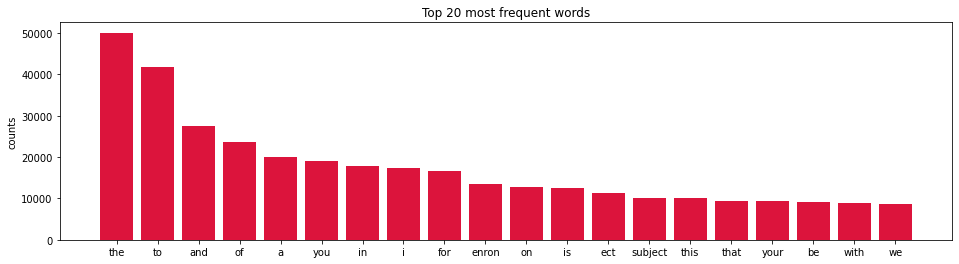

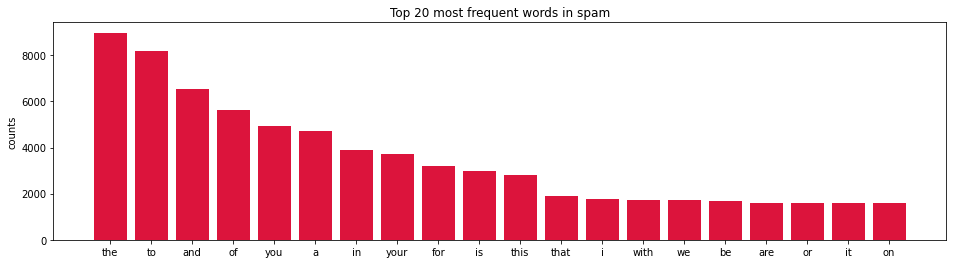

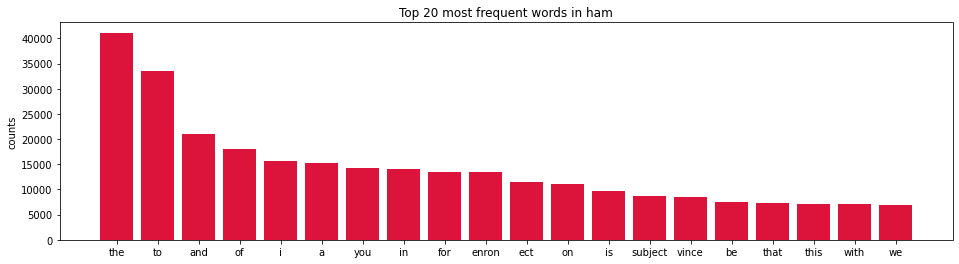

In [10]:
# word_counts[1:21] # Leave out the counts of whitespace and plot top 20 frenquent words

plt.figure(figsize=(16,4))
plt.bar(word_counts[1:21].index, word_counts[1:21], color='crimson')
plt.title("Top 20 most frequent words")
plt.ylabel("counts")

plt.figure(figsize=(16,4))
plt.bar(word_counts_spam[1:21].index, word_counts_spam[1:21], color='crimson')
plt.title("Top 20 most frequent words in spam")
plt.ylabel("counts")

plt.figure(figsize=(16,4))
plt.bar(word_counts_ham[1:21].index, word_counts_ham[1:21], color='crimson')
plt.title("Top 20 most frequent words in ham")
plt.ylabel("counts")

As can be seen from the plot graph, the stop words show most frequent in the sentence. So it is necessary to strip the stop words from the sentences.

In [11]:
# remove the stop words and digital numbers
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
def clean_stopwords_digits(text):
  text = ' '.join(word for word in text.split() if word not in stopwords)
  text = ''.join(i for i in text if not i.isdigit())
  return text

# update the cleaned text and their lengthes
data["text_cleaned"] = data['text_cleaned'].apply(clean_stopwords_digits)
data["length"] = data["text_cleaned"].apply(lambda x: len(x.split()))
data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,spam,length,text_cleaned
0,Subject: naturally irresistible your corporate...,1,113,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,64,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,40,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,46,subject color printing special request additi...
4,"Subject: do not have money , get software cds ...",1,19,subject money get software cds software compat...
...,...,...,...,...
5723,Subject: re : research and development charges...,0,106,subject research development charges gpg forwa...
5724,"Subject: re : receipts from visit jim , than...",0,119,subject receipts visit jim thanks invitation v...
5725,Subject: re : enron case study update wow ! a...,0,188,subject enron case study update wow day super ...
5726,"Subject: re : interest david , please , call...",0,97,subject interest david please call shirley cre...


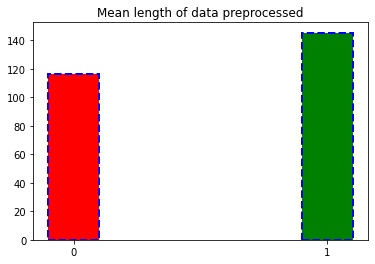

Average sentence length of Spam are 117.0 words
Average sentence of Ham are 145.0 words
Average sentence of dataset are 139.0 words


In [12]:
# statistical information of preprocessed data
mean_length = [None,None]
mean_length[0] = np.mean(data['length'][0:1368]) # with class of 1
mean_length[1] = np.mean(data['length'][1368:]) #with class of 0
plt.bar(class_list, mean_length, color=['r', 'g', 'b'], width=0.2, tick_label=class_list,  ec='b', ls='--', lw=2)
plt.title("Mean length of data preprocessed")
plt.show()
print("Average sentence length of Spam are {} words".format(round(mean_length[0],0)))
print("Average sentence of Ham are {} words".format(round(mean_length[1],0)))
print("Average sentence of dataset are {} words".format(round(np.mean(data["length"]),0)))

In [13]:
# count the unique words after preprocessing
word_counts = data['text_cleaned'].str.split(' ', expand=True).stack().value_counts()
word_counts_spam = data["text_cleaned"][0:1368].str.split(' ', expand=True).stack().value_counts()
word_counts_ham = data["text_cleaned"][1368:].str.split(' ', expand=True).stack().value_counts()
print("The unique words of spam: {}, of ham: {}, and of the whole dataset: {}".format(word_counts_spam.size,word_counts_ham.size,word_counts.size))

The unique words of spam: 17316, of ham: 24078, and of the whole dataset: 33604


Text(0, 0.5, 'counts')

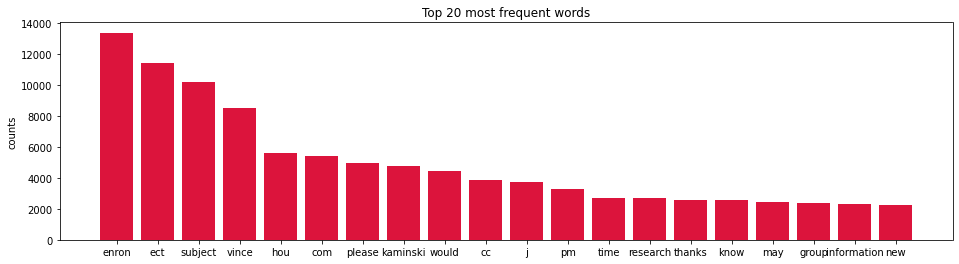

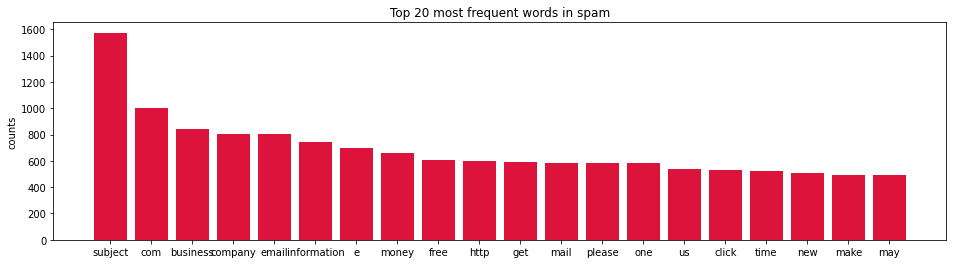

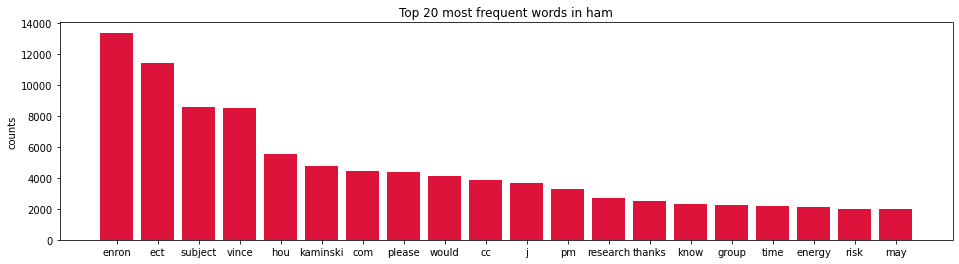

In [14]:

plt.figure(figsize=(16,4))
plt.bar(word_counts[1:21].index, word_counts[1:21], color='crimson')
plt.title("Top 20 most frequent words")
plt.ylabel("counts")

plt.figure(figsize=(16,4))
plt.bar(word_counts_spam[1:21].index, word_counts_spam[1:21], color='crimson')
plt.title("Top 20 most frequent words in spam")
plt.ylabel("counts")

plt.figure(figsize=(16,4))
plt.bar(word_counts_ham[1:21].index, word_counts_ham[1:21], color='crimson')
plt.title("Top 20 most frequent words in ham")
plt.ylabel("counts")

It is also necessary to remove most frequent words.

In [15]:
# Remove the top 20 frequent words
FREQWORDS = set([w for w in word_counts[1:21].index])
def remove_freqwords(text):
    return " ".join([word for word in text.split() if word not in FREQWORDS])

# update the cleaned text and their lengthes
data["text_cleaned"] = data['text_cleaned'].apply(remove_freqwords)
data["length"] = data["text_cleaned"].apply(lambda x: len(x.split()))
data

,text,spam,length,text_cleaned
0,Subject: naturally irresistible your corporate...,1,111,naturally irresistible corporate identity lt r...
1,Subject: the stock trading gunslinger fanny i...,1,62,stock trading gunslinger fanny merrill muzo co...
2,Subject: unbelievable new homes made easy im ...,1,37,unbelievable homes made easy im wanting show h...
3,Subject: 4 color printing special request add...,1,42,color printing special request additional clic...
4,"Subject: do not have money , get software cds ...",1,18,money get software cds software compatibility ...
...,...,...,...,...
5723,Subject: re : research and development charges...,0,58,development charges gpg forwarded shirley cren...
5724,"Subject: re : receipts from visit jim , than...",0,103,receipts visit jim invitation visit lsu shirle...
5725,Subject: re : enron case study update wow ! a...,0,164,case study update wow day super thank much com...
5726,"Subject: re : interest david , please , call...",0,46,interest david call shirley crenshaw assistant...


In [16]:
word_counts = data['text_cleaned'].str.split(' ', expand=True).stack().value_counts()
word_counts_spam = data["text_cleaned"][0:1368].str.split(' ', expand=True).stack().value_counts()
word_counts_ham = data["text_cleaned"][1368:].str.split(' ', expand=True).stack().value_counts()
print("The unique words of spam: {}, of ham: {}, and of the whole dataset: {}".format(word_counts_spam.size,word_counts_ham.size,word_counts.size))

The unique words of spam: 17297, of ham: 24057, and of the whole dataset: 33583


Text(0, 0.5, 'counts')

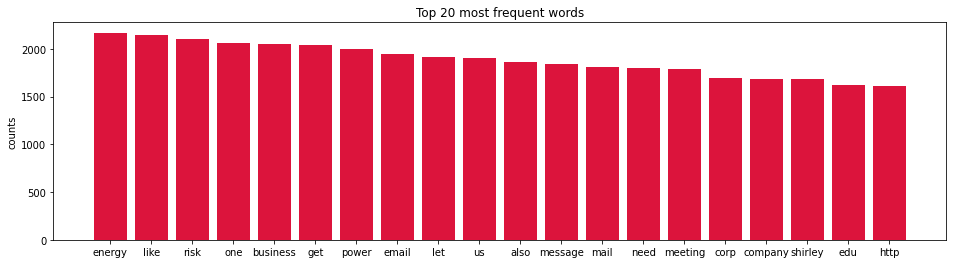

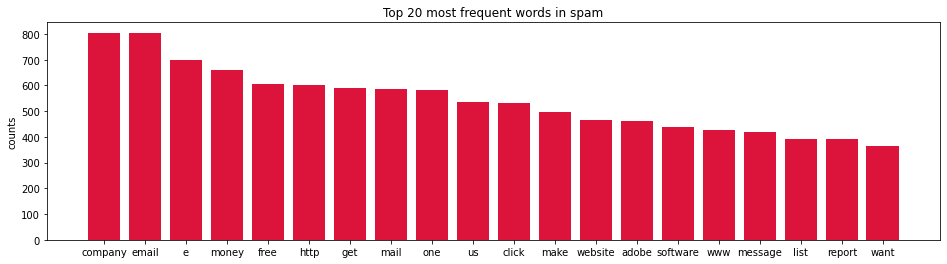

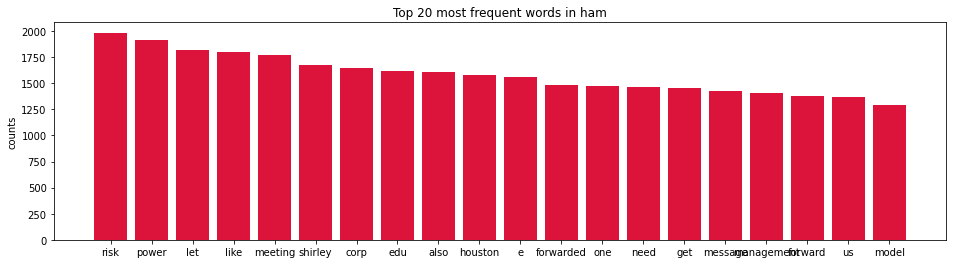

In [17]:
plt.figure(figsize=(16,4))
plt.bar(word_counts[1:21].index, word_counts[1:21], color='crimson')
plt.title("Top 20 most frequent words")
plt.ylabel("counts")

plt.figure(figsize=(16,4))
plt.bar(word_counts_spam[1:21].index, word_counts_spam[1:21], color='crimson')
plt.title("Top 20 most frequent words in spam")
plt.ylabel("counts")

plt.figure(figsize=(16,4))
plt.bar(word_counts_ham[1:21].index, word_counts_ham[1:21], color='crimson')
plt.title("Top 20 most frequent words in ham")
plt.ylabel("counts")

In [18]:
data.sort_values(by='length', ascending=False).head(10)

,text,spam,length,text_cleaned
1380,Subject: from the enron india newsdesk - april...,0,3962,india newsdesk april th newsclips fyi news art...
2650,Subject: from the enron india newsdesk - april...,0,3958,india newsdesk april th newsclips fyi news art...
2338,Subject: from the enron india newsdesk - april...,0,2569,india newsdesk april rd newsclips sound articl...
2560,Subject: from the enron india newsdesk - may 5...,0,2342,india newsdesk newsclips stinson news articles...
536,Subject: make thousands just sending emails . ...,1,2212,make thousands sending emails easy yahoo earn ...
151,Subject: industry giants can ' t match this op...,1,2111,industry giants match opportunity another grou...
49,"Subject: breaking biotech news hey , i though...",1,1763,breaking biotech news hey thought might want t...
126,Subject: investment op in proven nasa technolo...,1,1758,investment op proven nasa technology hey thoug...
1594,Subject: from the enron india newsdesk - may 4...,0,1527,india newsdesk th newsclips stinson news artic...
1359,"Subject: the government grants you $ 25 , 000 ...",1,1508,government grants free personal business grant...


Now, it is time to start training!

In [19]:
# to compare the performance, we define X_uncleaned as original text
X = data['text_cleaned']
y = data['spam']
X_uncleaned = data['text']

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

def classify_with_Count(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                               ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy with CountVectorizer:', pipeline_model.score(x_test, y_test)*100)
    y_pred = pipeline_model.predict(x_test)
    
    print(classification_report(y_test, y_pred))
    print(pd.crosstab(y_test, y_pred))
def classify_with_Tfid(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', TfidfVectorizer()),
                               ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy with TfidVevtorizer:', pipeline_model.score(x_test, y_test)*100)
    y_pred = pipeline_model.predict(x_test)
    
    print(classification_report(y_test, y_pred))
    print(pd.crosstab(y_test, y_pred))

In [21]:
# naive Bayes model with cleaned text
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify_with_Count(model, X, y)
classify_with_Tfid(model, X, y)

Accuracy with CountVectorizer: 99.12739965095986
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       872
           1       0.97      0.99      0.98       274

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

col_0    0    1
spam           
0      865    7
1        3  271
Accuracy with TfidVevtorizer: 90.22687609075044
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       872
           1       1.00      0.59      0.74       274

    accuracy                           0.90      1146
   macro avg       0.94      0.80      0.84      1146
weighted avg       0.91      0.90      0.89      1146

col_0    0    1
spam           
0      872    0
1      112  162


In [22]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify_with_Count(model, X_uncleaned, y)
classify_with_Tfid(model, X_uncleaned, y)

Accuracy with CountVectorizer: 99.21465968586386
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       872
           1       0.97      1.00      0.98       274

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

col_0    0    1
spam           
0      864    8
1        1  273
Accuracy with TfidVevtorizer: 86.64921465968587
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       872
           1       1.00      0.44      0.61       274

    accuracy                           0.87      1146
   macro avg       0.93      0.72      0.77      1146
weighted avg       0.89      0.87      0.85      1146

col_0    0    1
spam           
0      872    0
1      153  121


Now turn to the feed forward training

In [23]:
vectorizer = TfidfVectorizer()
X_data = vectorizer.fit_transform(X)
X_data = X_data.toarray()
x_train, x_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [24]:
from keras.models import Sequential
from keras import layers

input_dim = x_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

import keras.backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
    
    


model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
               metrics=['accuracy',f1_metric])

In [25]:
import tensorflow as tf
def scheduler(epoch, lr):
        if epoch < 5:
            return lr
        else:
            return lr * tf.math.exp(-0.1)
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3), 
                    tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)]

In [26]:
history = model.fit(x_train, y_train,epochs=5, validation_data=(x_test, y_test), batch_size= 20)

Epoch 1/5
230/230 [==============================] - 3s 11ms/step - loss: 0.4607 - accuracy: 0.8710 - f1_metric: 0.5755 - val_loss: 0.2703 - val_accuracy: 0.9459 - val_f1_metric: 0.8570
Epoch 2/5
230/230 [==============================] - 2s 10ms/step - loss: 0.1607 - accuracy: 0.9897 - f1_metric: 0.9577 - val_loss: 0.1228 - val_accuracy: 0.9852 - val_f1_metric: 0.9617
Epoch 3/5
230/230 [==============================] - 2s 9ms/step - loss: 0.0670 - accuracy: 0.9983 - f1_metric: 0.9916 - val_loss: 0.0755 - val_accuracy: 0.9904 - val_f1_metric: 0.9749
Epoch 4/5
230/230 [==============================] - 2s 10ms/step - loss: 0.0350 - accuracy: 0.9996 - f1_metric: 0.9900 - val_loss: 0.0549 - val_accuracy: 0.9939 - val_f1_metric: 0.9808
Epoch 5/5
230/230 [==============================] - 3s 13ms/step - loss: 0.0208 - accuracy: 0.9998 - f1_metric: 0.9820 - val_loss: 0.0436 - val_accuracy: 0.9948 - val_f1_metric: 0.9833


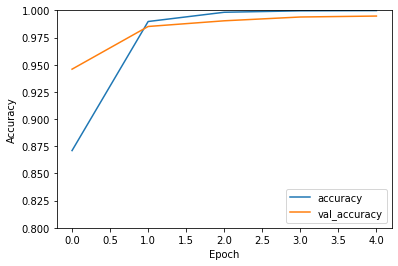

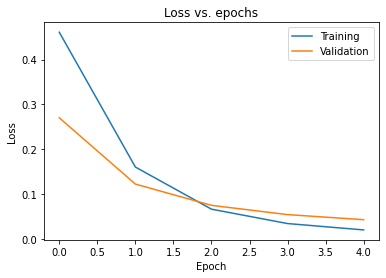

In [27]:
from matplotlib import pyplot as plt 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [28]:
# postprocessing and compute f1 score
y_pred = model.predict(x_test)
y_pred_bool = np.round(y_pred).astype(int).flatten()
print(classification_report(y_test, y_pred_bool))
pd.crosstab(y_test, y_pred_bool)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       0.99      0.99      0.99       274

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



col_0,0,1
spam,,
0,870,2
1,4,270


In [29]:
from keras.preprocessing.text import Tokenizer
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)

X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train[2])


[2, 68, 575, 10, 185, 238, 39, 68, 9, 881, 904, 30, 1196, 64, 364]


In [30]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 1000

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [31]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 50)          1518450   
                                                                 
 flatten (Flatten)           (None, 50000)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                500010    
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,018,471
Trainable params: 2,018,471
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9998
Testing Accuracy:  0.9869


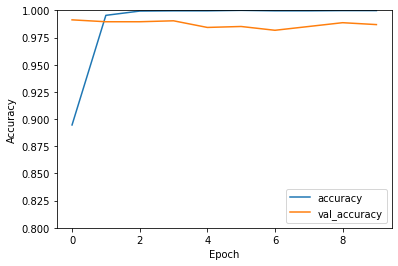

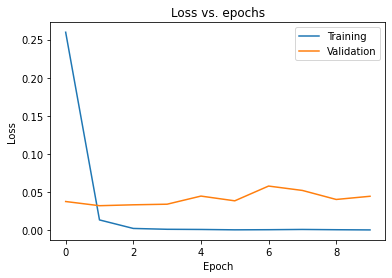

In [33]:
from matplotlib import pyplot as plt 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [34]:
# postprocessing and compute f1 score
y_pred = model.predict(X_test)
y_pred_bool = np.round(y_pred).astype(int).flatten()
print(classification_report(y_test, y_pred_bool))
pd.crosstab(y_test, y_pred_bool)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       872
           1       0.99      0.96      0.97       274

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



col_0,0,1
spam,,
0,868,4
1,11,263


In [35]:
from collections import Counter
from itertools import combinations
from math import log
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pformat
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds, norm
from string import punctuation

In [36]:
data

,text,spam,length,text_cleaned
0,Subject: naturally irresistible your corporate...,1,111,naturally irresistible corporate identity lt r...
1,Subject: the stock trading gunslinger fanny i...,1,62,stock trading gunslinger fanny merrill muzo co...
2,Subject: unbelievable new homes made easy im ...,1,37,unbelievable homes made easy im wanting show h...
3,Subject: 4 color printing special request add...,1,42,color printing special request additional clic...
4,"Subject: do not have money , get software cds ...",1,18,money get software cds software compatibility ...
...,...,...,...,...
5723,Subject: re : research and development charges...,0,58,development charges gpg forwarded shirley cren...
5724,"Subject: re : receipts from visit jim , than...",0,103,receipts visit jim invitation visit lsu shirle...
5725,Subject: re : enron case study update wow ! a...,0,164,case study update wow day super thank much com...
5726,"Subject: re : interest david , please , call...",0,46,interest david call shirley crenshaw assistant...


In [37]:
punctrans = str.maketrans(dict.fromkeys(punctuation))
def tokenize(title):
    x = title.lower() # Lowercase
    x = x.encode('ascii', 'ignore').decode() # Keep only ascii chars.
    x = x.translate(punctrans) # Remove punctuation
    return x.split() # Return tokenized.

texts_tokenized = data['text'].apply(tokenize)

In [38]:
%%time
cx = Counter()
cxy = Counter()
for text in texts_tokenized:
    for x in text:
        cx[x] += 1
    for x, y in map(sorted, combinations(text, 2)):
        cxy[(x, y)] += 1

CPU times: user 7min 52s, sys: 2.82 s, total: 7min 55s
Wall time: 7min 55s


In [39]:
texts_tokenized

0       [subject, naturally, irresistible, your, corpo...
1       [subject, the, stock, trading, gunslinger, fan...
2       [subject, unbelievable, new, homes, made, easy...
3       [subject, 4, color, printing, special, request...
4       [subject, do, not, have, money, get, software,...
                              ...                        
5723    [subject, re, research, and, development, char...
5724    [subject, re, receipts, from, visit, jim, than...
5725    [subject, re, enron, case, study, update, wow,...
5726    [subject, re, interest, david, please, call, s...
5727    [subject, news, aurora, 5, 2, update, aurora, ...
Name: text, Length: 5728, dtype: object

In [40]:
%%time
print('%d tokens before' % len(cx))
min_count = (1 / 1000) * len(data)
max_count = (1 / 50) * len(data)
for x in list(cx.keys()):
    if cx[x] < min_count or cx[x] > max_count:
        del cx[x]
print('%d tokens after' % len(cx))
print('Most common:', cx.most_common()[:25])

37379 tokens before
9516 tokens after
Most common: [('industries', 114), ('express', 114), ('bankruptcy', 114), ('examples', 114), ('200', 114), ('entire', 114), ('correct', 114), ('academic', 114), ('whole', 114), ('exposure', 114), ('gave', 114), ('susan', 114), ('parsons', 114), ('post', 113), ('finally', 113), ('watch', 113), ('commerce', 113), ('administrative', 113), ('eastern', 113), ('howard', 113), ('operational', 113), ('gary', 113), ('murphy', 113), ('dupont', 113), ('sector', 112)]
CPU times: user 47.9 ms, sys: 2.01 ms, total: 49.9 ms
Wall time: 50.9 ms


In [41]:
%%time
for x, y in list(cxy.keys()):
    if x not in cx or y not in cx:
        del cxy[(x, y)]

CPU times: user 21.3 s, sys: 110 ms, total: 21.4 s
Wall time: 21.5 s


In [42]:
%%time
x2i, i2x = {}, {}
for i, x in enumerate(cx.keys()):
    x2i[x] = i
    i2x[i] = x

CPU times: user 11.3 ms, sys: 0 ns, total: 11.3 ms
Wall time: 12.2 ms


In [43]:
sx = sum(cx.values())
sxy = sum(cxy.values())

In [44]:
%%time
pmi_samples = Counter()
data, rows, cols = [], [], []
for (x, y), n in cxy.items():
    rows.append(x2i[x])
    cols.append(x2i[y])
    data.append(log((n / sxy) / (cx[x] / sx) / (cx[y] / sx)))
    pmi_samples[(x, y)] = data[-1]
PMI = csc_matrix((data, (rows, cols)))
print('%d non-zero elements' % PMI.count_nonzero())
print('Sample PMI values\n', pformat(pmi_samples.most_common()[:10]))

3652834 non-zero elements
Sample PMI values
 [(('surbl', 'uri'), 8.116277222571197),
 (('biotech', 'genethera'), 8.116277222571197),
 (('beckman', 'biotech'), 8.116277222571197),
 (('biotech', 'milici'), 8.116277222571197),
 (('biotech', 'diseases'), 8.116277222571197),
 (('biotech', 'cattle'), 8.116277222571197),
 (('beckman', 'genethera'), 8.116277222571197),
 (('genethera', 'milici'), 8.116277222571197),
 (('diseases', 'genethera'), 8.116277222571197),
 (('cattle', 'genethera'), 8.116277222571197)]
CPU times: user 12.6 s, sys: 155 ms, total: 12.8 s
Wall time: 12.8 s


In [45]:
%%time
U, _, _ = svds(PMI, k=20)

CPU times: user 1.84 s, sys: 1.23 s, total: 3.07 s
Wall time: 1.64 s


In [46]:
norms = np.sqrt(np.sum(np.square(U), axis=1, keepdims=True))
U /= np.maximum(norms, 1e-7)

In [47]:
k = 5
for x in ['surbl','milici','express','examples','software']:
    dd = np.dot(U, U[x2i[x]]) # Cosine similarity for this unigram against all others.
    s = ''
    # Compile the list of nearest neighbor descriptions.
    # Argpartition is faster than argsort and meets our needs.
    for i in np.argpartition(-1 * dd, k + 1)[:k + 1]:
        if i2x[i] == x: continue
        s += '(%s, %.3lf) ' % (i2x[i], dd[i])
    print('%s, %d\n %s' % (x, cx[x], s))
    print('-' * 10)

surbl, 6
 (therapy, 0.957) (technician, 0.962) (trials, 0.952) (slaughter, 0.951) (surgery, 0.964) 
----------
milici, 6
 (molecular, 0.999) (kits, 0.995) (mad, 0.998) (mil, 0.989) (genetic, 0.981) 
----------
express, 114
 (governments, 0.735) (conditions, 0.704) (indicating, 0.709) (fresh, 0.716) (felt, 0.700) 
----------
examples, 114
 (interpretation, 0.822) (maximum, 0.790) (fully, 0.776) (determines, 0.772) (gracie, 0.766) 
----------


KeyError: ignored

In [3]:
from collections import Counter
from math import log

def gen_bigrams(data, window_size=5):
    for idx in range(len(data)):
        data = data.split()
        window = data[idx: idx + window_size]
       
        if len(window) < 2:
            break
            
        w = window[0]
        for next_word in window[1:]:
            yield (w, next_word)
            

def construct_vocab(data):
    vocab = Counter()
    
    for (w1, w2) in gen_bigrams(data, window_size=3): # count 1gram & 2gram
        vocab.update([w1, w2, (w1, w2)])
    return vocab
        

def calc_pmi(vocab):
    det = sum(vocab.values())
    
    for (w1, w2) in filter(lambda el: isinstance(el, tuple), vocab):
        p_a, p_b = float(vocab[w1]), float(vocab[w2])
        p_ab = float(vocab[(w1, w2)])
        
        yield (w1, w2, log((det * p_ab) / (p_a * p_b), 2))
    

corpus = ["i really have a dream","wait a moment"]
vocab = construct_vocab(corpus)

for (w1, w2, pmi) in calc_pmi(vocab):
    print("{}_{}: {:.3f}".format(w1, w2, pmi))

AttributeError: ignored

In [58]:
from collections import defaultdict
def co_occurrence(sentences, window_size):
    d = defaultdict(int)
    vocab = set()
    for text in sentences:
        # preprocessing (use tokenizer instead)
        #text = text.lower().split()
        # iterate over sentences
        for i in range(len(text)):
            token = text[i]
            vocab.add(token)  # add to vocab
            next_token = text[i+1 : i+1+window_size]
            for t in next_token:
                key = tuple( sorted([t, token]) )
                d[key] += 1

    # formulate the dictionary into dataframe
    vocab = sorted(vocab) # sort vocab
    df = pd.DataFrame(data=np.zeros((len(vocab), len(vocab)), dtype=np.int16),
                      index=vocab,
                      columns=vocab)
    for key, value in d.items():
        df.at[key[0], key[1]] = value
        df.at[key[1], key[0]] = value
    return df

In [59]:
text = texts_tokenized
df = co_occurrence(text, 3)
df

,,,,,,,,,,,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
,94,0,1,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,7,0,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zymg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zzmacmac,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zzn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zzncacst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
def pmi(df):
    col_totals = df.sum(axis=0)
    total = col_totals.sum()
    row_totals = df.sum(axis=1)
    expected = np.outer(row_totals, col_totals) / total
    df = df / expected
    # Silence distracting warnings about log(0):
    with np.errstate(divide='ignore'):
        df = np.log(df)
    df[np.isinf(df)] = 0.0  # log(0) = 0
    return df

In [1]:
ppmi = pmi(df)
ppmi

NameError: ignored

In [53]:
def pmi(df):
    '''
    Calculate the positive pointwise mutal information score for each entry
    https://en.wikipedia.org/wiki/Pointwise_mutual_information
    We use the log( p(y|x)/p(y) ), y being the column, x being the row
    '''
    # Get numpy array from pandas df
    arr = df.values

    # p(y|x) probability of each t1 overlap within the row
    row_totals = arr.sum(axis=1).astype(float)
    prob_cols_given_row = (arr.T / row_totals).T

    # p(y) probability of each t1 in the total set
    col_totals = arr.sum(axis=0).astype(float)
    prob_of_cols = col_totals / sum(col_totals)

    # PMI: log( p(y|x) / p(y) )
    # This is the same data, normalized
    ratio = prob_cols_given_row / prob_of_cols
    ratio[ratio==0] = 0.00001
    _pmi = np.log(ratio)
    _pmi[_pmi < 0] = 0

    return _pmi

pmi(data['text_cleaned'])

TypeError: ignored